In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

import statistics as stats
from datetime import datetime

from lib import utils
from lib.config import Config
from lib.models.bundle import Bundle
from lib.models.notification import Notification

In [2]:
notifications_filepath = "../data/notifications.csv"
bundles_filepath = "../data/bundles.csv"

In [3]:
notifications = list()
with open(notifications_filepath, "r") as fp:
    for line in fp.readlines():
        notifications.append(Notification.from_line(line, Config.CSV_HEADERS, ','))

In [4]:
def _increment_dict_val(d: dict, k: str, val: int = 1):
    if k in d:
        d[k] += val

    else:
        d[k] = val

    return d

bundles = list()

daily_avgs = list()
daily_loads = dict()  # value for the number of bundles a user receives daily
daily_delays = list()

with open(bundles_filepath, "r") as fp:
    previous_ts = None
    for line in fp.readlines():
        bundle = Bundle.from_line(line)
        bundles.append(bundle)

        current_ts = bundle.timestamp_last_tour

        if utils.is_a_new_day(current_ts, previous_ts):
            daily_avgs.append({
                "load": stats.mean(list(daily_loads.values())),
                "delay": stats.mean(daily_delays)
            })

            daily_loads = dict()
            daily_delays = list()

        if bundle.receiver_id in daily_loads:
            daily_loads[bundle.receiver_id] += 1

        else:
            daily_loads[bundle.receiver_id] = 1
            
        daily_delays.append((bundle.timestamp_last_tour - bundle.timestamp_first_tour).total_seconds())

        previous_ts = current_ts

In [5]:
print(f"Number of notifications: {len(notifications)}")
print(f"Number of bundles: {len(bundles)}\n")
print(f"Compression: {len(bundles) / len(notifications) * 100:.1f}%\n")

Number of notifications: 337657
Number of bundles: 153992

Compression: 45.6%



In [6]:
avg_load = stats.mean([daily_avg["load"] for daily_avg in daily_avgs])
std_load = stats.stdev([daily_avg["load"] for daily_avg in daily_avgs])

avg_delay = stats.mean([daily_avg["delay"] for daily_avg in daily_avgs])
std_delay = stats.stdev([daily_avg["delay"] for daily_avg in daily_avgs])

In [7]:
print(f"Average daily load: {avg_load:.2f} bundle/user/day")
print(f"Std dev daily load: {std_load:.2f} bundle/user/day\n")

print(f"Average daily delay: {avg_delay:.2f}sec ({avg_delay / 60:.1f}min)")
print(f"Std dev daily delay: {std_delay:.2f}sec ({std_delay / 60:.1f}min)")

Average daily load: 1.35 bundle/user/day
Std dev daily load: 0.09 bundle/user/day

Average daily delay: 2980.14sec (49.7min)
Std dev daily delay: 1189.08sec (19.8min)


<IPython.core.display.Javascript object>


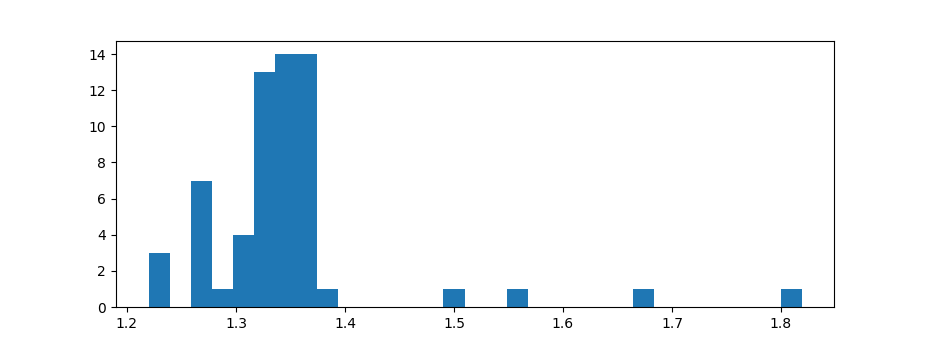

In [8]:
# histogram of daily number of bundles sent to top notified users
plt.hist(sorted([daily_avg["load"] for daily_avg in daily_avgs]), bins='auto')
plt.show()

<IPython.core.display.Javascript object>


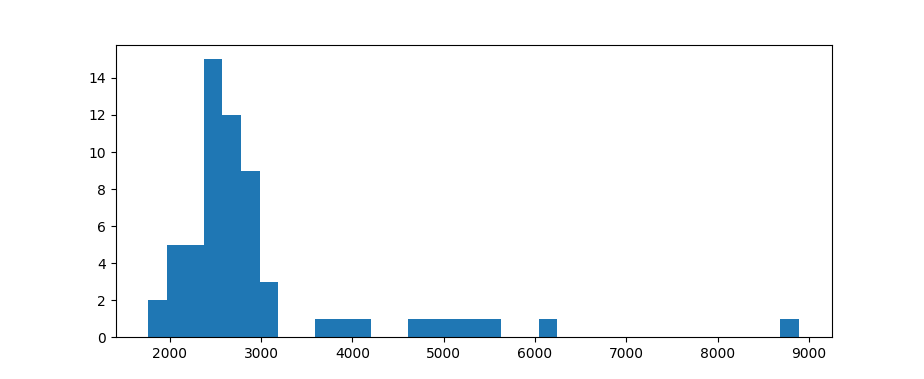

In [9]:
# histogram of daily number of bundles sent to top notified users
plt.hist(sorted([daily_avg["delay"] for daily_avg in daily_avgs]), bins='auto')
plt.show()